In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [98]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [99]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [100]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Checking for null values

<AxesSubplot:>

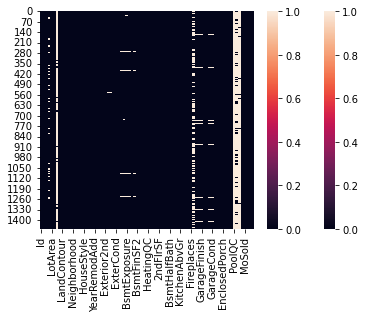

In [102]:
sns.heatmap(df.isnull())

sns.heatmap(df_test.isnull())

In [103]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

### Dropping columns with a lot of missing values

In [109]:
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 650]

df = df.drop(missing_cols, axis=1)
df_test = df_test.drop(missing_cols, axis=1)

print(df.shape)
print(df_test.shape)

(1460, 76)
(1459, 75)


### Finding Categorical Columns in dataset

In [115]:
categorical = [col for col in df.columns if df[col].dtypes == 'object']

In [116]:
print(categorical)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [120]:
X_train = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_test = df_test.copy()

In [121]:
print(X_train.shape)
print(X_test.shape)

(1460, 75)
(1459, 75)


## Encoding Categorical Values

In [136]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

ohe_X_train = pd.DataFrame(ohe.fit_transform(X_train[categorical]))
ohe_X_test = pd.DataFrame(ohe.transform(X_test[categorical]))

# One-hot encoding removed index, we put it back
ohe_X_train.index = X_train.index
ohe_X_test.index = X_test.index

# Remove categorical columns which will replace with one-hot encoded columns
num_X_train = X_train.drop(categorical, axis=1)
num_X_test = X_test.drop(categorical, axis=1)

# concating numerical and one hot encoded features
final_X_train = pd.concat([num_X_train, ohe_X_train], axis=1)
final_X_test = pd.concat([num_X_test, ohe_X_test], axis=1)

print(final_X_train.shape)
print(final_X_test.shape)


(1460, 282)
(1459, 282)


In [137]:
final_X_train.isnull().sum().sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Id               0
150              0
              ... 
65               0
66               0
67               0
68               0
244              0
Length: 282, dtype: int64

In [138]:
final_X_test.isnull().sum().sort_values(ascending=False)

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
BsmtFullBath      2
BsmtHalfBath      2
               ... 
70                0
71                0
72                0
73                0
244               0
Length: 282, dtype: int64

In [139]:
imputer = SimpleImputer()

imputed_X_train = pd.DataFrame(imputer.fit_transform(final_X_train))
imputed_X_test = pd.DataFrame(imputer.transform(final_X_test))

imputed_X_train.columns = final_X_train.columns
imputed_X_test.columns = final_X_test.columns


In [141]:
imputed_X_train.isnull().sum().sort_values(ascending=False)

Id     0
148    0
154    0
153    0
152    0
      ..
63     0
64     0
65     0
66     0
244    0
Length: 282, dtype: int64

In [142]:
imputed_X_test.isnull().sum()

Id             0
MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
              ..
240            0
241            0
242            0
243            0
244            0
Length: 282, dtype: int64

In [153]:
sample_submission = pd.read_csv('sample_submission.csv')

# Traning our model 

In [157]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=7, n_estimators=1000, learning_rate=0.05)
xgb.fit(imputed_X_train, y)

predictions = xgb.predict(imputed_X_test)

print(len(predictions))

output = pd.DataFrame({'Id': sample_submission.Id,'SalePrice': predictions})
output.to_csv('submission.csv', index=False)

1459
